In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Mini Project/Dataset.csv')
df.head()

,batting_team,bowling_team,venue,current_score,is_powerplay,balls_left,wickets_left,current_run_rate,Top_Order,Middle_Order,Lower_Order,Tail,last_five,Death_Overs,final_score
0,South Africa,India,Johannesburg,171,0,15,7,9.771429,0,1,0,0,61,1,219
1,India,South Africa,Cape Town,66,0,71,9,8.081633,1,0,0,0,35,0,172
2,West Indies,Sri Lanka,Pallekele,120,0,9,6,6.486486,0,0,1,0,47,1,129
3,Australia,England,Melbourne,118,0,18,5,6.941176,0,0,1,0,38,1,147
4,South Africa,Sri Lanka,Johannesburg,69,0,56,5,6.468750,0,0,1,0,29,0,113


**Pressure and Aggression Feature**

In [3]:
df['pressure'] = (df['current_run_rate'] <= 7).astype(int)
df['aggression'] = (df['last_five'] >= 45).astype(int)

In [4]:
df.head()

,batting_team,bowling_team,venue,current_score,is_powerplay,balls_left,wickets_left,current_run_rate,Top_Order,Middle_Order,Lower_Order,Tail,last_five,Death_Overs,final_score,pressure,aggression
0,South Africa,India,Johannesburg,171,0,15,7,9.771429,0,1,0,0,61,1,219,0,1
1,India,South Africa,Cape Town,66,0,71,9,8.081633,1,0,0,0,35,0,172,0,0
2,West Indies,Sri Lanka,Pallekele,120,0,9,6,6.486486,0,0,1,0,47,1,129,1,1
3,Australia,England,Melbourne,118,0,18,5,6.941176,0,0,1,0,38,1,147,1,0
4,South Africa,Sri Lanka,Johannesburg,69,0,56,5,6.468750,0,0,1,0,29,0,113,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43183 entries, 0 to 43182
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   batting_team      43183 non-null  object 
 1   bowling_team      43183 non-null  object 
 2   venue             43183 non-null  object 
 3   current_score     43183 non-null  int64  
 4   is_powerplay      43183 non-null  int64  
 5   balls_left        43183 non-null  int64  
 6   wickets_left      43183 non-null  int64  
 7   current_run_rate  43183 non-null  float64
 8   Top_Order         43183 non-null  int64  
 9   Middle_Order      43183 non-null  int64  
 10  Lower_Order       43183 non-null  int64  
 11  Tail              43183 non-null  int64  
 12  last_five         43183 non-null  int64  
 13  Death_Overs       43183 non-null  int64  
 14  final_score       43183 non-null  int64  
 15  pressure          43183 non-null  int32  
 16  aggression        43183 non-null  int32 

array([[<Axes: title={'center': 'current_score'}>,
        <Axes: title={'center': 'is_powerplay'}>,
        <Axes: title={'center': 'balls_left'}>,
        <Axes: title={'center': 'wickets_left'}>],
       [<Axes: title={'center': 'current_run_rate'}>,
        <Axes: title={'center': 'Top_Order'}>,
        <Axes: title={'center': 'Middle_Order'}>,
        <Axes: title={'center': 'Lower_Order'}>],
       [<Axes: title={'center': 'Tail'}>,
        <Axes: title={'center': 'last_five'}>,
        <Axes: title={'center': 'Death_Overs'}>,
        <Axes: title={'center': 'final_score'}>],
       [<Axes: title={'center': 'pressure'}>,
        <Axes: title={'center': 'aggression'}>, <Axes: >, <Axes: >]],
      dtype=object)

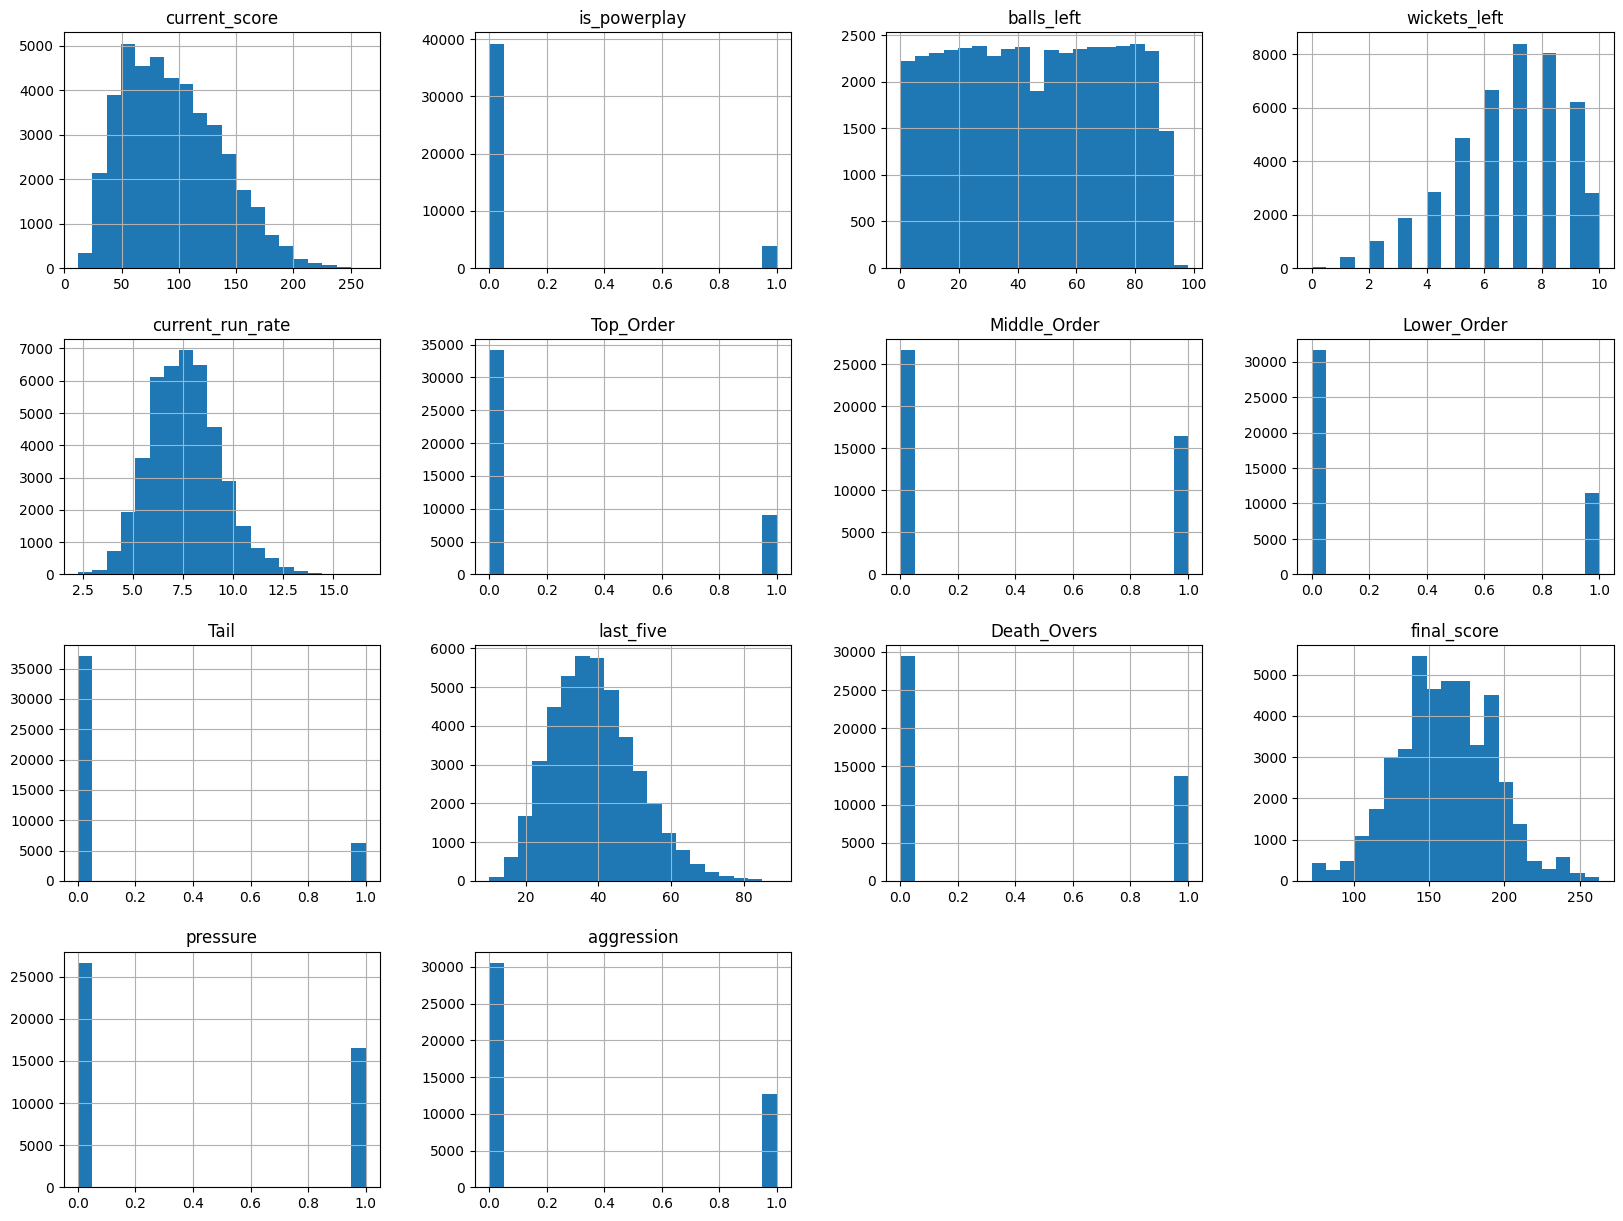

In [6]:
df.hist(bins=20, figsize=(20, 15))

**Correlation Comparison**

In [7]:
colForCorr = ['current_score', 'is_powerplay', 'balls_left', 'wickets_left', 'current_run_rate', 'Top_Order', 'Middle_Order', 'Lower_Order', 'Tail', 'last_five', 'Death_Overs', 'pressure', 'aggression']
dfForCorr = df[colForCorr]
corr = dfForCorr.corr()
corr

,current_score,is_powerplay,balls_left,wickets_left,current_run_rate,Top_Order,Middle_Order,Lower_Order,Tail,last_five,Death_Overs,pressure,aggression
current_score,1.000000,-0.402314,-0.861007,-0.386150,0.541583,-0.296664,-0.110103,0.204991,0.237890,0.519779,0.714434,-0.463729,0.408630
is_powerplay,-0.402314,1.000000,0.495668,0.300075,0.006167,0.314652,-0.014935,-0.170320,-0.129118,-0.026726,-0.216277,0.019523,-0.017419
balls_left,-0.861007,0.495668,1.000000,0.670424,-0.081433,0.474245,0.198097,-0.303632,-0.441332,-0.183304,-0.807807,0.110486,-0.147667
wickets_left,-0.386150,0.300075,0.670424,1.000000,0.304497,0.648881,0.290472,-0.343395,-0.721825,0.247674,-0.563163,-0.247055,0.162735
current_run_rate,0.541583,0.006167,-0.081433,0.304497,1.000000,0.249501,0.021567,-0.111902,-0.177979,0.768347,0.096192,-0.769729,0.592226
Top_Order,-0.296664,0.314652,0.474245,0.648881,0.249501,1.000000,-0.402969,-0.309789,-0.209721,0.199148,-0.328543,-0.201459,0.145957
Middle_Order,-0.110103,-0.014935,0.198097,0.290472,0.021567,-0.402969,1.000000,-0.473939,-0.320848,0.005243,-0.233235,-0.019930,-0.020037
Lower_Order,0.204991,-0.170320,-0.303632,-0.343395,-0.111902,-0.309789,-0.473939,1.000000,-0.246657,-0.067097,0.226040,0.088890,-0.039486
Tail,0.237890,-0.129118,-0.441332,-0.721825,-0.177979,-0.209721,-0.320848,-0.246657,1.000000,-0.153530,0.419079,0.149050,-0.091642
last_five,0.519779,-0.026726,-0.183304,0.247674,0.768347,0.199148,0.005243,-0.067097,-0.153530,1.000000,0.208872,-0.590241,0.787292


In [8]:
df.isnull().sum()

batting_team        0
bowling_team        0
venue               0
current_score       0
is_powerplay        0
balls_left          0
wickets_left        0
current_run_rate    0
Top_Order           0
Middle_Order        0
Lower_Order         0
Tail                0
last_five           0
Death_Overs         0
final_score         0
pressure            0
aggression          0
dtype: int64

**Splitting of Data**

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['final_score'], axis=1), df['final_score'], test_size=0.2, random_state=42)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(34546, 16)
(34546,)
(8637, 16)
(8637,)


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [13]:
X_train[:1]

,batting_team,bowling_team,venue,current_score,is_powerplay,balls_left,wickets_left,current_run_rate,Top_Order,Middle_Order,Lower_Order,Tail,last_five,Death_Overs,pressure,aggression
23297,Sri Lanka,Australia,Cape Town,81,0,25,3,5.115789,0,0,0,1,26,1,1,0


In [14]:
y_train[:1]

23297    101
Name: final_score, dtype: int64

**Pipelines for Cattegories and Numeric Values**

In [15]:
catPipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder())
])
numPipeline = Pipeline(steps=[
    ('scale', StandardScaler())
])

In [16]:
transformer = ColumnTransformer(transformers=[
    ('cat_pipe', catPipeline, ['batting_team', 'bowling_team', 'venue']),
    ('num_pipe', numPipeline, ['current_score', 'balls_left', 'wickets_left', 'current_run_rate', 'last_five'])
])

In [17]:
final_pipe = Pipeline(steps=[
    ('transformer', transformer),
    ('model', LinearRegression())
])

In [18]:
final_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat_pipe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['batting_team',
                                                   'bowling_team', 'venue']),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['current_score',
                                                   'balls_left', 'wickets_left',
                                                   'current_run_rate',
                                                   'last_five'])])),
                ('model', LinearRegression())])

In [19]:
clf = final_pipe.fit(X_train, y_train)

In [20]:
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**Evaluation of the Model (MSE, MAE, R2 Score)**

In [22]:
# Print coefficients
print("Coefficients:")
print(clf.named_steps['model'].coef_)  # Coefficients for each feature
print("Intercept:")
print(clf.named_steps['model'].intercept_)  # Intercept

# Calculate evaluation metrics for the training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the metrics for both training and test sets
print("Training Set Metrics:")
print("Mean Absolute Error (MAE):", train_mae)
print("Mean Squared Error (MSE):", train_mse)
print("R-squared (R2) Score:", train_r2)
print("\nTest Set Metrics:")
print("Mean Absolute Error (MAE):", test_mae)
print("Mean Squared Error (MSE):", test_mse)
print("R-squared (R2) Score:", test_r2)

Coefficients:
[ -4.27065806   7.73904727  -6.24762371   6.23387074   2.38293622
  -2.32327652   0.49161564  -3.80244774   0.11039867  -0.31386251
   1.18524577   0.29472979   1.92774532   5.44847679  -2.84201259
   0.31618965  -4.31042413  -5.29635005  -2.60672492   5.88312437
 -13.41748213  -2.86743851   6.29547316  -2.54662603  -7.02053611
   2.27040718   4.10016853  -6.67225702  -0.05509336  -2.62207009
   9.68201091   6.8659891  -12.01477553   5.2908442   13.41298101
   2.96379965  -3.07819551  10.67898144  -6.62798009   5.30094018
   0.61589285   6.47939988   2.73060692  -7.90033356   8.73804326
  13.12473158  -2.9643354    2.0081745    1.34194922  -5.64022601
  -1.12939997 -11.87989922 -13.3283746   -0.97693701  12.71786407
   7.48345638  -1.48348987  23.07617832  -4.2194177    4.14684001
  -4.98843727  -5.7732807    5.11671331  -4.00713973 -14.34643527
  -2.75067413  -3.3847736  -14.04198462   1.29614737  28.0678257
  16.79541805   9.89703875   5.5119039   -0.61330564]
Intercept

## **Provide Insights from data based on following question:**

1) Other than home ground, where did Sri Lanka play the most number of matches?

In [23]:
srilanka_cricket_grounds = [
    "Galle",
    "Kandy",
    "Moratuwa",
    "Dambulla",
    "Katunayake",
    "Kurunegala",
    "Colombo",
    "Hambantota",
    "Pallekele"
]

df['venue'] = df['venue'].str.title()

filteredData = df[~df['venue'].isin(srilanka_cricket_grounds)]
filteredData = filteredData[(filteredData['batting_team']=='Sri Lanka') | (filteredData['bowling_team']=='Sri Lanka')]
offGroundList = filteredData['venue'].value_counts().reset_index()
print(f'Max number of Matches: \n {offGroundList[0:1]}')
offGroundList[:5]

Max number of Matches: 
         venue  count
0  Chittagong    473


,venue,count
0,Chittagong,473
1,Johannesburg,470
2,Mirpur,468
3,Lahore,383
4,London,382


Text(0.5, 1.0, 'Srilankan Team Off Ground Matches')

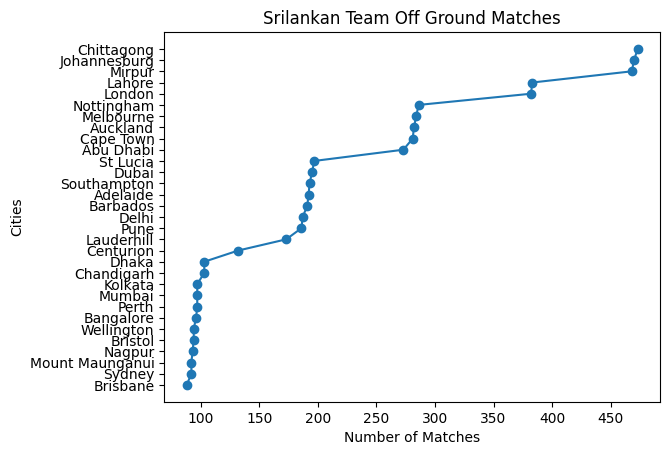

In [24]:
offGroundList = pd.DataFrame(offGroundList.sort_values(ascending=True, by='count'))
plt.plot(offGroundList['count'], offGroundList['venue'], marker='o', linestyle='-')
plt.xlabel('Number of Matches')
plt.ylabel('Cities')
plt.title('Srilankan Team Off Ground Matches')

2) Which Team has the highest score and opposition against which team did it occur?

In [25]:
filteredData = df.iloc[df['final_score'].idxmax()]
filteredData = pd.DataFrame(filteredData)
filteredData.rename(columns={769: 'Highest Score History'})


,Highest Score History
batting_team,Australia
bowling_team,Sri Lanka
venue,Pallekele
current_score,57
is_powerplay,1
balls_left,92
wickets_left,10
current_run_rate,12.214286
Top_Order,1
Middle_Order,0


3) Which team has the highest run rate?

In [26]:
filteredData = df.groupby('batting_team')['final_score'].sum().reset_index()
totalScore = filteredData.sum()
runRate = filteredData['final_score']/totalScore.iloc[1]
filteredData['RunRate'] = runRate
filteredData = pd.DataFrame(filteredData.sort_values(ascending=True, by='RunRate'))
filteredData.rename(columns={'final_score': 'Run Rate'})

# totalRunsPerTeam = df.groupby('batting_team')['final_score'].sum()
# totalMatchesPerTeam = df['batting_team'].value_counts()
# totalMatchesPerTeam = totalMatchesPerTeam*20
# highestRunRate = pd.DataFrame(totalRunsPerTeam/totalMatchesPerTeam)
# filteredData = pd.DataFrame(highestRunRate.sort_values(by=0, ascending=False))
# filteredData.rename(columns={'final_score': 'Run Rate'})

,batting_team,Run Rate,RunRate
0,Afghanistan,112157,0.016122
2,Bangladesh,356564,0.051254
9,West Indies,673693,0.096840
3,England,750881,0.107936
4,India,774114,0.111275
8,Sri Lanka,775941,0.111538
7,South Africa,808748,0.116254
1,Australia,832749,0.119704
5,New Zealand,935428,0.134463
6,Pakistan,936469,0.134613


Text(0.5, 1.0, 'Run Rate Stats')

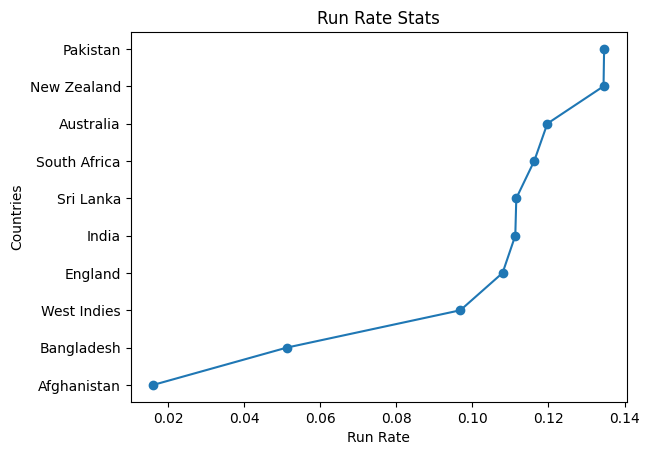

In [27]:
plt.plot(filteredData['RunRate'], filteredData['batting_team'], marker='o', linestyle='-')
plt.xlabel('Run Rate')
plt.ylabel('Countries')
plt.title('Run Rate Stats')

Text(0.5, 1.0, 'Line Graph Example')

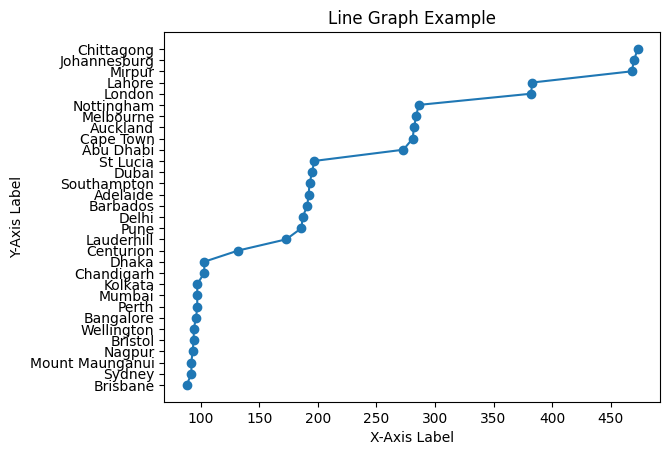

In [28]:
plt.plot(offGroundList['count'], offGroundList['venue'], marker='o', linestyle='-')
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Line Graph Example')

4) Which batting order (Top Order, Middle Order, Lower Order, or Tail) performed the best in
terms of average runs scored?

5) What is the average pressure score in matches where the Tail was batting?

In [29]:
filteredData = df[(df['Tail'] == 1) & (df['pressure'] == 1)]
totalScore = filteredData.groupby('Tail')['final_score'].sum()
averageScore = filteredData['final_score']/totalScore.iloc[0]
filteredData = pd.DataFrame(averageScore.sort_values(ascending=False))
filteredData.rename(columns={'final_score': 'Average Score'})

,Average Score
26959,0.000433
29621,0.000433
322,0.000433
38736,0.000433
24583,0.000433
...,...
13229,0.000174
6879,0.000174
12996,0.000174
31338,0.000174


6) In how many matches was the Aggression Mode set to 1? describe the teams with most
aggressive Matches

In [30]:
filteredData = df[(df['aggression'] == 1)]
filteredData
print(f'Times Aggression mode in matches: {len(filteredData)}')

filteredData = filteredData['batting_team'].value_counts().reset_index()
pd.DataFrame(filteredData.sort_values(ascending=False, by='count'))

Times Aggression mode in matches: 12639


,batting_team,count
0,New Zealand,1887
1,Australia,1878
2,Pakistan,1620
3,South Africa,1560
4,England,1439
5,India,1418
6,Sri Lanka,1169
7,West Indies,1146
8,Bangladesh,407
9,Afghanistan,115


Text(0.5, 1.0, 'No of Aggression Playing')

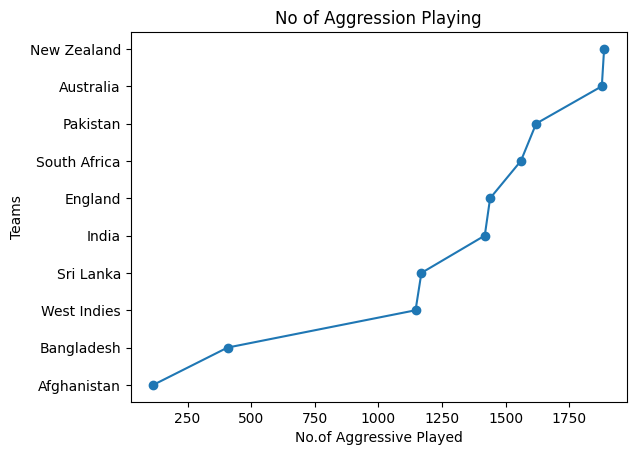

In [31]:
filteredData = pd.DataFrame(filteredData.sort_values(ascending=True, by='count'))
plt.plot(filteredData['count'], filteredData['batting_team'], marker='o', linestyle='-')
plt.xlabel('No.of Aggressive Played')
plt.ylabel('Teams')
plt.title('No of Aggression Playing')

7) What is the average runs scored by India in the last five overs (Death Overs) across all
matches?

In [32]:
filteredData = df[((df['batting_team'] == 'India') & (df['Death_Overs'] == 1))]
totalScore = filteredData['last_five'].sum()
filteredData
averageScore = {
    'Tam': 'India',
    'Average Score in Death Overs': totalScore/len(filteredData)
}
pd.DataFrame(averageScore, index=[1])


,Tam,Average Score in Death Overs
1,India,44.302187


8) Highest and Average score in Johannesburg?

In [33]:
filteredData = df[df['venue'] == 'Johannesburg']
highest = filteredData['final_score'].max()
averageScore = filteredData['final_score'].sum() / len(filteredData)

Johannesburg = {
    'Highest Score': highest,
    'Average Score': averageScore
}

pd.DataFrame(Johannesburg, index=[1])

,Highest Score,Average Score
1,231,171.919545


9) Highest and Average target set against Pakistan?

In [34]:
filteredData = df[df['bowling_team'] == 'Pakistan']
highest = filteredData['final_score'].max()
averageScore = filteredData['final_score'].sum() / len(filteredData)

target = {
    'Highest Target': highest,
    'Average Target': averageScore
}

pd.DataFrame(target, index=[1])

,Highest Target,Average Target
1,211,150.051712


10) Visualize the highest vs lowest score of a team

In [35]:
team_max_scores = df.groupby('batting_team')['final_score'].max().reset_index()
team_min_scores = df.groupby('batting_team')['final_score'].min().reset_index()

team_max_scores = pd.DataFrame(team_max_scores.sort_values(ascending=True, by='final_score'))
team_min_scores = pd.DataFrame(team_min_scores.sort_values(ascending=True, by='final_score'))

**Max Score**

In [36]:
team_max_scores

,batting_team,final_score
0,Afghanistan,164
6,Pakistan,205
2,Bangladesh,211
8,Sri Lanka,215
4,India,240
3,England,241
7,South Africa,241
5,New Zealand,243
9,West Indies,245
1,Australia,263


**Min Score**

In [37]:
team_min_scores

,batting_team,final_score
0,Afghanistan,72
4,India,74
5,New Zealand,74
7,South Africa,77
2,Bangladesh,78
6,Pakistan,83
1,Australia,89
9,West Indies,95
8,Sri Lanka,101
3,England,111


Text(0.5, 1.0, 'Maximum Score')

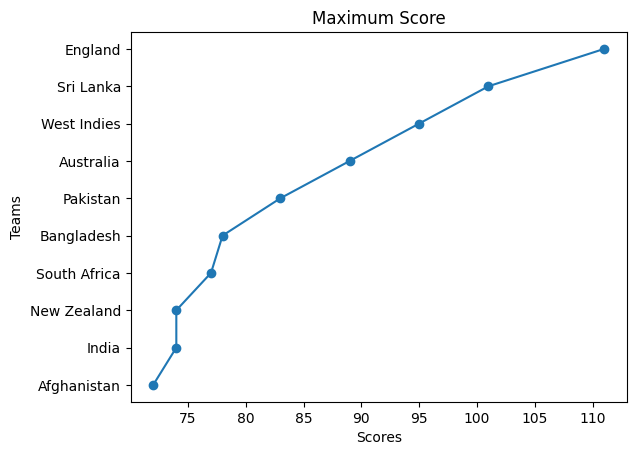

In [38]:
plt.plot(team_min_scores['final_score'], team_min_scores['batting_team'], marker='o', linestyle='-')
plt.xlabel('Scores')
plt.ylabel('Teams')
plt.title('Maximum Score')

11) Average Number of wickets fallen in death Overs?

In [39]:
# filteredData = df[df['Death_Overs'] == 1]

# # averageScore = filteredData['final_score'].sum() / len(filteredData)

# # target = {
# #     'Highest Target': highest,
# #     'Average Target': averageScore
# # }

# # pd.DataFrame(target, index=[1])

12) Average target set by Pakistan in their homeland? Note: Homeland may include cities of
Pakistan and UAE

In [40]:
pakistan_stadiums = [
    "Karachi",
    "Lahore",
    "Multan",
    "Rawalpindi",
    "Faisalabad",
    "Peshawar",
    "Larkana",
    "Hyderabad",
    "Quetta",
]

uae_stadiums = [
    "Abu Dhabi",
    "Dubai",
    "Sharjah",
    "Ajman",
    "Ras Al Khaimah",
    "Fujairah",
    "Al Dhaid",
]

df['venue'] = df['venue'].str.title()

filteredData = df[((df['batting_team'] == 'Pakistan') & ((df['venue'].isin(pakistan_stadiums)) | (df['venue'].isin(uae_stadiums))))]

averageTarget = filteredData['final_score'].sum() / len(filteredData)

target = {
    'Average Target': averageTarget
}

pd.DataFrame(target, index=[1])


,Average Target
1,151.805463


13) describe the average runs scored by each team under pressure

In [41]:
filteredData = df[df['pressure'] == 1]
averageRunsPerTeam = filteredData.groupby('batting_team')['final_score'].sum()
averageMatchesPerTeam = filteredData['batting_team'].value_counts()
averageRuns = pd.DataFrame(averageRunsPerTeam/averageMatchesPerTeam)
filteredData = pd.DataFrame(averageRuns.sort_values(by=0, ascending=False))
filteredData.rename(columns={0: 'Average Runs'})

,Average Runs
batting_team,
India,143.835399
England,141.289332
Australia,141.271261
South Africa,140.006882
Bangladesh,133.959893
Sri Lanka,133.814639
West Indies,132.968238
Pakistan,132.388025
New Zealand,132.192270


14)  describe the average runs scored by each team in death overs

In [42]:
filteredData = df[df['Death_Overs'] == 1]
averageRunsPerTeam = filteredData.groupby('batting_team')['last_five'].sum()
averageMatchesPerTeam = filteredData['batting_team'].value_counts()
averageRuns = pd.DataFrame(averageRunsPerTeam/averageMatchesPerTeam)
filteredData = pd.DataFrame(averageRuns.sort_values(by=0, ascending=False))
filteredData.rename(columns={0: 'Average Runs (Death Overs)'})

,Average Runs (Death Overs)
batting_team,
Australia,45.073406
New Zealand,44.457064
India,44.302187
South Africa,43.536148
Pakistan,41.954711
England,41.442321
West Indies,40.587068
Sri Lanka,40.220967
Afghanistan,39.832700


15) describe the average target by each Team

In [43]:
averageRunsPerTeam = df.groupby('batting_team')['final_score'].sum()
averageMatchesPerTeam = df['batting_team'].value_counts()
averageRuns = pd.DataFrame(averageRunsPerTeam/averageMatchesPerTeam)
filteredData = pd.DataFrame(averageRuns.sort_values(by=0, ascending=False))
filteredData.rename(columns={0: 'Average Runs (Death Overs)'})

,Average Runs (Death Overs)
batting_team,
Australia,171.136252
India,166.511938
England,164.992529
New Zealand,164.138972
South Africa,163.846840
Sri Lanka,157.104880
West Indies,155.947454
Pakistan,155.922244
Bangladesh,150.069024
